In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('volume_pressure_data.csv')
df.head()

,Volume,Pressure
0,48,29.1250
1,46,30.5625
2,44,31.9375
3,42,33.5000
4,40,35.3125


In [ ]:
#calculation and inputing the Volume and Pressures mean, median, and STD into the Data Frame 
df['Volume Mean'] = df['Volume'].mean()
df['Volume Median'] = df['Volume'].median()
df['Volume Standard Deviation'] = df['Volume'].std()


df['Pressure Mean'] = df['Pressure'].mean()
df['Pressure Median'] = df['Pressure'].median()
df['Pressure Standard Deviation'] = df['Pressure'].std()


In [ ]:
df.head()


,Volume,Pressure,Volume Mean,Volume Median,Volume Standard Deviation,Pressure Mean,Pressure Median,Pressure Standard Deviation
0,48,29.1250,27.12,24.0,11.192706,61.5075,58.8125,25.840546
1,46,30.5625,27.12,24.0,11.192706,61.5075,58.8125,25.840546
2,44,31.9375,27.12,24.0,11.192706,61.5075,58.8125,25.840546
3,42,33.5000,27.12,24.0,11.192706,61.5075,58.8125,25.840546
4,40,35.3125,27.12,24.0,11.192706,61.5075,58.8125,25.840546


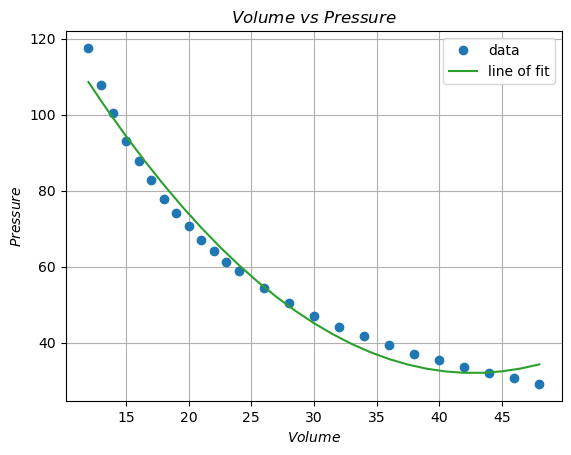

In [ ]:
#finding polyfit line 
x2 = np.linspace(start=min(df['Volume']), stop=max(df['Volume']), num=25)
coeff = np.polyfit(df['Volume'], df['Pressure'],deg=2)
y = lambda x : coeff[0]*x**2 +coeff[1]*x + coeff[2] # lambda here acts like def function, just works inline!


#graph showing relation between volume and pressure 
plt.plot(df['Volume'], df['Pressure'],'o', label= 'data')
plt.plot(x2, y(x2), color= 'C2', label= 'line of fit')

plt.xlabel('$Volume$')
plt.ylabel('$Pressure$') 
plt.title('$Volume$ $vs$ $Pressure$')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#equation for poly fit line
def equation (x):
    y1 = coeff[0]*x**2 +coeff[1]*x + coeff[2]
    """
    Finding the y coordinate using fitted plot given x.

    Parameters:
    x (float): x-coordinate.

    Returns:
    float: y-coordinate.
    """
    return y1
#this equation is y = 8.11467652e-02 x^2 - 6.93261665 x + 1.80077908e+02

# This equation fits closely with the graph but does not fully describe the relationship between volume and pressure. According to 
#Boyles Law, volume and pressures are inversly proportional and the equation shown above is quadratic.

In [ ]:
# Calculate the root mean square error (RMSE) between the fitted polynomial curve and the actual
#data points. Use NumPy for this calculation.
#Report the RMSE value and briefly discuss whether the polynomial fit represents the data well

In [ ]:
#finding the RMSE between the fitted polynomial curve and the actual data points.  
polyCalcPressure = [equation(x)for x in df["Volume"]] 
def RMSE (predicted, actual):
   
    squared_errors = [(p-a) for p,a in zip(predicted, actual)]
    mean_squared = np.mean(squared_errors)

    """
    Finds Root Mean Square Error given two lists.

    Parameters:
    predicted (list): list containing predicted data points
    actual (list): list containg all of the actual data points

    Returns:
    float: Root Mean Square Error
    """
    
    return np.sqrt(mean_squared)
    
RMSE(polyCalcPressure, df["Pressure"] )  

# The root mean square error between the fitted polynomial curve and the actual data points is 2.5118955976611944e-07. 
# RMSE ranges from 0 to infinity, where the close the value is to 0, the better fit the predict to the actual data points. Since the RMSE 
# value is pretty close to 0, it suggests that there is a strong fit between the polynomial to the data. However, there can still be room for 
# improvemnent as Boyles suggests that there is an inversely proportional relationship. 

2.5118955976611944e-07